# Control Systems 1, NB03: Time Response and Stability
2024 ETH Zurich, Mark Benazet Castells, Jonas Holinger, Felix Muller, Matteo Penlington; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli


This interactive notebook is designed to introduce fundamental concepts in control systems engineering. It covers the basics of system modeling, classification, and analysis, with a focus on building intuition through visual and interactive examples.

Authors:
- Jonas Holinger; jholinger@ethz.ch
- Shubham Gupta; shugupta@ethz.ch

## Learning Objectives

After completing this notebook, you should be able to:

1. Understand how to compute the transfer function and its various forms
2. Understand the various definitions related to transfer functins and how to analyse it
3. Understand the impulse response of a system and its importance
4. Understand computing various input responses for a system

# Setup
## Installing the required packages:

In [2]:
%pip install numpy matplotlib scipy ipywidgets control IPython

Note: you may need to restart the kernel to use updated packages.


## Import the packages
The following cell imports the required packages. Run it before running the rest of the notebook.

In [3]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
from scipy.integrate import odeint
from IPython.display import display, clear_output, Math
from ipywidgets import interactive


## Transfer Functions and Output Response

In Lecture 4 we observed that the response of a LTI system with respect to time is given by, 
$$
    x(t) = e^{At}x(0) + \int_0^t e^{A(t-\tau)}Bu(\tau)d\tau
$$
Where $e^{At}x(0)$ signifies the Initial condition response and $int_0^t e^{A(t-\tau)}Bu(\tau)d\tau$ signifies the forced response. The behavious can be difficult to analyse in the time doamin, hence we were introduced to transfer functions, which make use of the $s$-domain, or an extended frequency domain for analysis.


Recall that for a general LTI system given by:

$$
    \dot{x}(t) = Ax(t)+Bu(t)\\
    y(t) = Cx(t)+Du(t)
$$
the system transfer function can be given by:
$$
    G(s) = \frac{Y(s)}{U(s)} = C(sI-A)^{-1}B + D
$$

This transfer function captures the various periodic and exponential (rise and decay) components of the input and output.

While this transfer function is useful and contains a lot of information, we can rearrange this transfer function in various forms to make it easier for us to analyse.

### Transfer Function for a SISO system

For a SISO(Single Input Single Output) system, the transfer function can be written simply as a **stricly proper rational function**(degree of numerator < degree of denominator) + **direct feedtrough** like
$$
    G(s) = \frac{N(s)}{D(s)} = \frac{b_ms^m + b_{m-1}s^{m-1} + \ldots + b_0}{s^n + a_{n-1}s^{n-1} + \ldots + b_0} + d
$$
with $m<n$.

Since the numerator and denominator are polynomials, they can factorised using their roots.

*Note: a polynomial of degree $n$ with complex coefficients with always have $n$ complex roots (reals numbers are a subset of complex numbers.)*

Thus the transfer function can be written as:
$$
    G(s) = k_{rl} \cdot\frac{(s-z_1)(s-z_2)\ldots(s-z_m)}{(s-p_1)(s-p_2)\ldots(s-p_n)}
$$
This is called as the **Root Locus Form** of the transfer function, used for, as you might have guessed, the root locus analysis of th system, which will be dicussed in detail next week.  
The roots of the denominator $p_1,p_2,\ldots, p_n$ are called the **Poles** of the transfer function and roots of the numerator $z_1,z_2,\dots, z_n$ are called the **Zeros** of the transfer function. The *poles* are also the roots of the characterstic polynomial $det(sI-A)$, i.e., the poles are just the eigenvalues of $A$ and the denominator of the transfer function is the characterstic polynomial.

The form can also be rearranged to 
$$
  G(s) = k_{\text{Bode}} \cdot \frac{(\frac{s}{-z_1}+1)(\frac{s}{-z_2}+1)\ldots(\frac{s}{-z_m}+1)}{(\frac{s}{-p_1}+1)(\frac{s}{-p_2}+1)\ldots(\frac{s}{-p_n}+1)} 
$$
This is called the **Bode Form** of the transfer function.

Using the *poles* the transfer function can also be decomposed into partial fractions leading to thr **Partial Fraction Expansion** of the transfer function
$$
  G(s) = \frac{r_1}{s-p_1} + \frac{r_2}{s-p_2}+ \ldots + \frac{r_n}{s-p_n} + r_0
$$

The values $r_1\ldots r_n$ are called the **residues**. As will be discussed later, each term in the partial fraction exapansion determies a term of the impulse response of the system.

Now that we know about the vaious forms of the transfer function, how do we convert between each form.
Given any form we can alwyas convert to the basic rational functin form by multiplying everything .

From the rational function form we can convert to *Root Locus* form by finding the roots of the numerator and denominator and factorsing the polynomials. any extra multiplier are accumulated in the term $k_{rl}$.

The *Bode* form can be achived from the *Root locus* form by dividing the numerator and denominator by their respective roots
$$
  (s-p_i) = -p_i(\frac{s}{-p_i}+1)
$$
Therefore
$$
\begin{align*}
  G(s) &= k_{rl} \cdot\frac{(s-z_1)(s-z_2)\ldots(s-z_m)}{(s-p_1)(s-p_2)\ldots(s-p_n)} \\
  &= k_{rl} \cdot \frac{(-z_1)(\frac{s}{-z_1}+1)(-z_2)(\frac{s}{-z_2}+1)\ldots(-z_m)(\frac{s}{-z_m}+1)}{(-p_1)(\frac{s}{-p_1}+1)(-p_2)(\frac{s}{-p_2}+1)\ldots(-p_n)(\frac{s}{-p_n}+1)}\\
  &= k_{\text{Bode}} \cdot \frac{(\frac{s}{-z_1}+1)(\frac{s}{-z_2}+1)\ldots(\frac{s}{-z_m}+1)}{(\frac{s}{-p_1}+1)(\frac{s}{-p_2}+1)\ldots(\frac{s}{-p_n}+1)}
\end{align*}
$$

#### Cover-Up Method

To obtain the *partial function expansion* we use the Heaveside Cover-up method. The method essentially states that to calculate the residue for a pole $p_i$ "cover up"/ignore the the term $(s-p_i)$ and substitute $p_i$ in the rest of the function, Hence the name cover up method. 

Formally, for a non-repeated pole the residue is given by 
$$
    r_i = \lim_{s\rightarrow p_i}(s-p_i)G(s)
$$

For a repeated pole is becomes slightly complex
$$
    r_i = \frac{1}{(m-1)!}\lim_{s\rightarrow p_i}\frac{d^{m-1}}{ds^{m-1}}((s-p_i)^mG(s))
$$
where $m$ is the multiplicity of the pole.

Using these methods we can convert between the different forms of the transfer function.

### Examples for transfer function conversion

## Magnitude and Phase of $G(s)$

From the previous lecture we covered that the steady state output to an sinusoidal input will have the same frequency as the input, but will be scaled by the magnitude and shifted by the phase of $G(s)$. Now we want to know how to calulate the these. We can only calculate the magnitude and phase for a stable LTI-system.  

$$y_{ss}(t)=\left|G(s) \right|sin(t+\angle G(s))$$

We use the substituion $s=jw$. By doing this we we evalute the transfer function at purely imaginary values.  This specifically captures the system's response to sinusoidal inputs at frequency $\omega$, known as the frequency response of the steady state $G(j\omega)$.

 We can use the properties from complex numbers. 

#### Example
As an example of an sinuisoidal input applied to an transfer function lets consider $u(t)=sin(3t)$ and $G(s) = 3 \cdot \frac{s + 3}{(s + 2 - i)(s + 2 + i)}$. The substitution $u(t)=sin(3t)$ is suitable for our calculation, since $\omega =3$. 

Below is a plot of the location of the poles, zero and the input  in the complex plane.
<img src="media/pole_zero_plot_with_input.png" width="500"/>

### Calculating the Magnitude $ \left| G(s) \right| $
The defintion of the magnitude of a complex number $z=a+bj$ is $\left| z \right| = \sqrt{a^2+b^2}$. The following laws will help us calculating the magnitude

$$\left| a\cdot b \right| = \left| a \right| \cdot \left| b \right|$$
$$\left| \frac{a}{b} \right| = \frac{\left| a \right|}{\left| b \right|}$$

Through the substituion in the numerator we get the complex number $$3(3j+3)$$

The magnitude of the numerator is therefore $$3(\sqrt{3^2+3^2} = 9\sqrt{2}$$
This corresponds to the length of the vector from the zero $z=-3$ to s multiplied by the gain 3.
<br>Through the substituion in the denumerator we get the complex number $$(3j+2-j)(3j+2+j) = (2j+2)(4j+2)$$
To calculate the magnitude of the denumerator we use the the law from above:
$$\left| (2j+2)\cdot (4j+2) \right| = \left| (2j+2) \right| \cdot \left| (4j+2) \right| = \sqrt{2^2+2^2}\sqrt{4^2+2^2} = 4\sqrt(10)$$

This corresponds to the length of the two vector from the two poles $-2 \pm{j}$ to $s=3j$ multiplied.
<br>We can find the magnitude of $G(j\omega)$ using one of the laws above which leaves us with $$\left| \frac{9\sqrt{2}}{4\sqrt{10}}\right| = \frac{9\sqrt{2}}{4\sqrt{10}}
$$.

Below you can se that see the graphical visualisation of the magnitude of the pole $(s + 2 + i)$ to the input $u(t)=sin(3t)$

<img src="media/pole_zero_plot_with_input_magn.png" width="500"/>



### How to calculate the Phase $ \angle G(s) $
The definiton of phase or argument of a complex number $z$ is$\theta = \tan^{-1}\left(\frac{b}{a}\right)$.

#### Quadrants of the Complex Plane
One need to be carefule, since the value of $\tan^{-1}\left(\frac{b}{a}\right)$ alone does not account for the quadrant in which could lie complex number in. In your calculator the function $atan2$ corrects for this.

However for calculating the phase by hand, the following cases are need to distinguished:
<img src="media/complex_quadrants.png" width="300"/>


1. **Quadrant I**: $a > 0,b > 0$
   - $\theta = \tan^{-1}\left(\frac{b}{a}\right)$

2. **Quadrant II**: $a < 0,b > 0$ 
   - $\theta = \tan^{-1}\left(\frac{b}{a}\right) + 180^\circ $

3. **Quadrant III**: $a < 0,b < 0$
   - $\theta = \tan^{-1}\left(\frac{b}{a}\right) - 180^\circ $


4. **Quadrant IV**: $a > 0, \, b < 0$
   - $\theta = \tan^{-1}\left(\frac{b}{a}\right)$


For calculating we can use the following laws. c is a constant.
<br>
$$\angle (a \cdot b) = (\angle a) + (\angle b)$$
$$\angle (\frac{a}{b})= \angle a-\angle b$$
<br>
$$\angle c\cdot (1 + 1j)=\tan^{-1}(\frac{1}{1})= 45^{\circ}$$
$$\angle (c \cdot j)=\tan^{-1}(\frac{j}{0})=\tan^{-1}(\infty) = 90^{\circ}$$
$$\angle (c)=\tan^{-1}(\frac{0}{c})=\tan^{-1}(0) = 0^{\circ}$$
<br>
$$\tan^{-1}(-x) = -\tan^{-1}(x)$$

We can calculate the phase of $G(s)$ witht the following steps. Using the law $\angle (\frac{a}{b})= \angle a-\angle b$ and our substitution $s=3j$ we get

$$\angle G(j3) = \angle(3 + 3j)) - (\angle(2j+2)+\angle(4j+2)$$
We know that $\angle(3 + 3j)$ has the same angle as $\angle(1 + 1j)$ and $\angle(2j+2)$.The angle is therefore $45^{\circ}$.
<br>
The angle of $\angle(2 + 4j)$ can be calculated using $ \tan^{-1}\left(\frac{4}{2}\right) = \tan^{-1}(2) \approx 63.43^\circ$
<br>
Therefore total phase of $G(j3)$ is = $45^{\circ}-(63.43^\circ+45^{\circ})= -63.43^\circ$.

Below we see that the phase of a pole/zero represents the angle between the real axis and the vector from the pole/zero to the input.
<img src="media/pole_zero_plot_with_input_phase.png" width="500"/>

### Visualisation

In the following interactive example you can input a transfer function and a frequency $\omega$ and get the magnitude,phase and a graph of the response out of it. To input your own transfer function, use this : 7,2,3,5 = $7s^3*2s^2*3s*5$ and click update. Try calculating the phase and magnitude by hand and then check if it matches the result.
Note that the system does not check wether your system. You need to click the button to update the graph.

Updated Transfer Function: G(s) = 
   3 s + 9
-------------
s^2 + 4 s + 5

Magnitude at ω = 3.0: |G(jω)| = 1.01
Phase at ω = 3.0: ∠G(jω) = -63.43 degrees



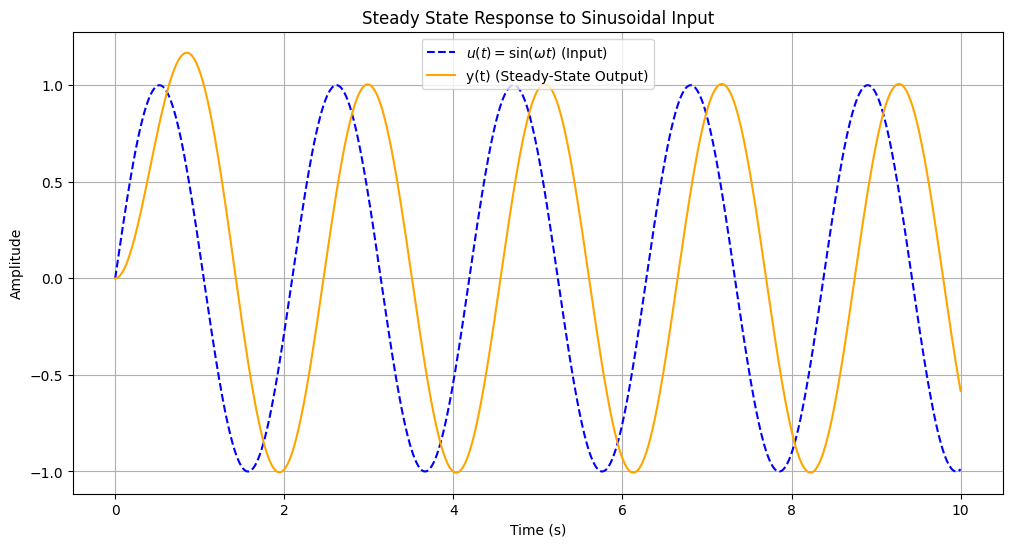

In [31]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interactive

# Initialize global transfer function
G = None

# Define the plot function
def plot_response_mp(omega):
    global G
    # Time vector
    t = np.linspace(0, 10, 1000)
    
    # Input signal
    u = np.sin(omega * t)
    
    # Steady-state response
    t_out, y_out = ct.forced_response(G, T=t, U=u)

    plt.figure(figsize=(12, 6))
    
    # Plot input sine wave
    plt.plot(t, u, label=r'$u(t) = \sin(\omega t)$ (Input)', color='blue', linestyle='--')
    
    # Plot the output response
    plt.plot(t_out, y_out, label='y(t) (Steady-State Output)', color='orange')
    
    plt.title(f'Steady State Response to Sinusoidal Input')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Calculate magnitude and phase
def calculate_magnitude_phase(omega):
    global G
    s = 1j * omega
    G_s = G(s)
    magnitude = abs(G_s)
    phase = np.angle(G_s, deg=True)
    return magnitude, phase

# Update transfer function and plot response
def update_transfer_function(numerator_input, denominator_input):
    global G

    try:
        numerator = [float(n) for n in numerator_input.split(',')]
        denominator = [float(d) for d in denominator_input.split(',')]
        
        G = ct.TransferFunction(numerator, denominator)
        
        # Check stability
        poles = ct.pole(G)
        is_stable = all(np.real(pole) < 0 for pole in poles)
        if not is_stable:
            print(f"Your system is unstable, try changing the poles")
            return
        
        # Display the transfer function, magnitude, and phase
        magnitude, phase = calculate_magnitude_phase(omega_slider.value)
        clear_output(wait=True)
        display(ui)
        
        print(f"Updated Transfer Function: G(s) = {G}")
        print(f"Magnitude at ω = {omega_slider.value}: |G(jω)| = {magnitude:.2f}")
        print(f"Phase at ω = {omega_slider.value}: ∠G(jω) = {phase:.2f} degrees\n")
        plot_response_mp(omega_slider.value)

    except ValueError:
        print("Please enter valid numbers separated by commas.")

numerator_input = widgets.Text(
    value='3,9',  
    description='Numerator:',
)

denominator_input = widgets.Text(
    value='1,4,5', 
    description='Denominator:',
)

update_button = widgets.Button(description="Update")
update_button.on_click(lambda b: update_transfer_function(numerator_input.value, denominator_input.value))

# Create a slider for omega
omega_slider = widgets.FloatSlider(
    value=3.0,  
    min=0.1,    
    max=10.0,   
    step=0.1,   
    description='ω:',
    continuous_update=True  
)

ui = widgets.VBox([numerator_input, denominator_input, omega_slider, update_button])

display(ui)


update_transfer_function(numerator_input.value, denominator_input.value)


## Transient response

We want to understand the effect of poles and zeros on the transient behavior. We use different standart test inputs for this. 


### Unit Impulse Input
The unit impulse Input $u(t)=\delta(t)$, is defined as:
$$
\delta(t) =
\begin{cases}
\infty & \text{if } t = 0 \\
0 & \text{if } t \neq 0
\end{cases}
$$
with the property:
$$
\int_{-\infty}^{\infty} \delta(t) \, dt = 1
$$
### Impulse Response

We can derive,that the impulse response is the same as the response to an inital condition $x(0)=B$.
We can get an understanding for this, if we consider $Y(s)=G(s)U(s)$ and remember that the Laplace-Transformation of the unit impulse is 1, we get $Y(S)=G(s)$.

The transfer function of a state-space model (A=a, B=b, C=c, D=0) is $$G(s) = \frac{r}{s-a}$$ with r=bc.
The response to an unit impulse (or to an initial condition x(0) = b) has the form

Above just copied
The impulse response totally defines the response of a system.?

### Unit Step Input
The unit step function, $u(t)$, is defined as:
$$
u(t) =
\begin{cases}
0 & \text{if } t < 0 \\
1 & \text{if } t \geq 0
\end{cases}
$$
which correspond to $u(t)=e^{0t}$.






## Different Test Input and Response to it
### Pole-Zero Cancellation


### Cover-up Method
### Minimum-Phase vs Non-Minimum-Phase System

NameError: name 'ui' is not defined

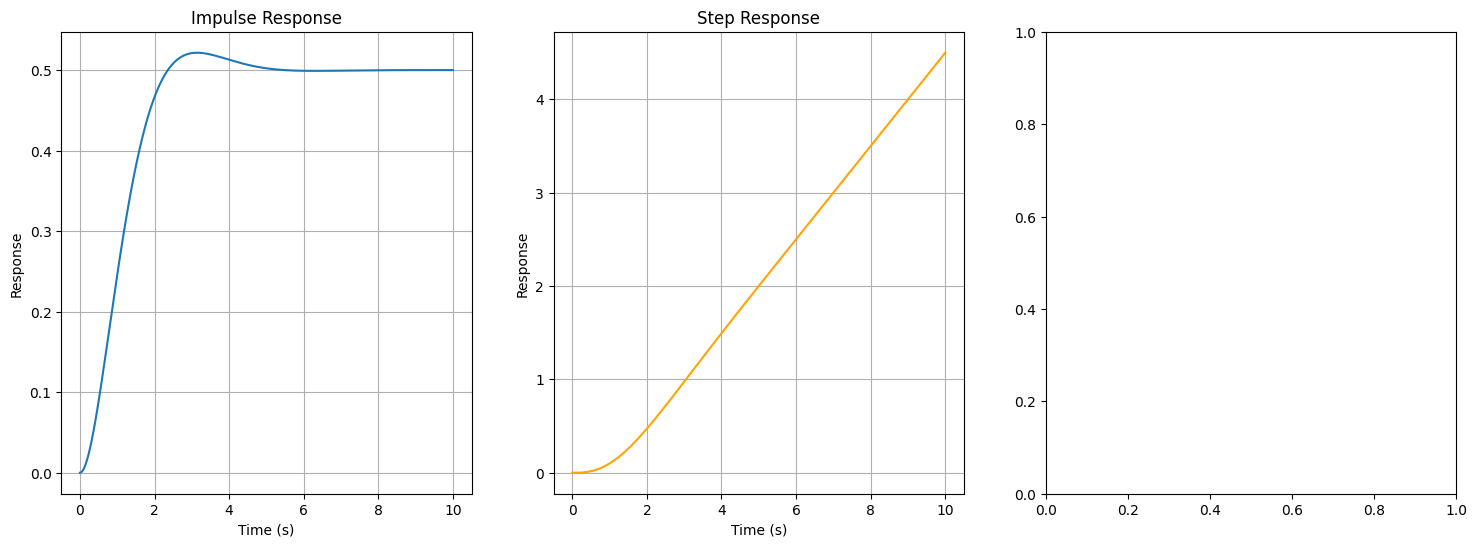

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from ipywidgets import FloatSlider, interactive, HBox, VBox, Label
from IPython.display import display, clear_output

# Define time vector for the impulse and step responses
t = np.linspace(0, 10, 1000)  # Time from 0 to 10 seconds

# Define a function to plot impulse and step responses
def plot_responses(real, imag, p1_real):
    clear_output(wait=True)  # Clears the previous output to update the plot
    
    # Define poles with specified real and imaginary parts
    poles = [real + 1j * imag, real - 1j * imag, p1_real]  # Complex conjugate poles and a real pole
    
    # Create the transfer function with the updated poles
    num = [1]  # Numerator remains the same: 2*(s + 1)
    den = np.poly(poles)  # Denominator is based on poles
    system = ctrl.TransferFunction(num, den)

    # Compute impulse response
    t_impulse, y_impulse = ctrl.impulse_response(system, T=t)
    
    # Compute step response
    t_step, y_step = ctrl.step_response(system, T=t)

    # Plot impulse response
    plt.figure(figsize=(18, 6))

    # Impulse Response
    plt.subplot(1, 3, 1)
    plt.plot(t_impulse, y_impulse)
    plt.title('Impulse Response')
    plt.xlabel('Time (s)')
    plt.ylabel('Response')
    plt.grid()

    # Step Response
    plt.subplot(1, 3, 2)
    plt.plot(t_step, y_step, color='orange')
    plt.title('Step Response')
    plt.xlabel('Time (s)')
    plt.ylabel('Response')
    plt.grid()

    # Pole-Zero Plot
    plt.subplot(1, 3, 3)
    current_poles = ctrl.pole(system)
    current_zeros = ctrl.zero(system)
    plt.scatter(np.real(current_zeros), np.imag(current_zeros), marker='o', label='Zeros', color='blue', s=100)
    plt.scatter(np.real(current_poles), np.imag(current_poles), marker='x', label='Poles', color='red', s=100)
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.title('Pole-Zero Plot')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.grid()
    plt.legend()

    # Display the plots
    plt.tight_layout()
    plt.savefig('example_plot.png')

    plt.show()

# Define sliders for real and imaginary parts
real_slider = FloatSlider(value=-1, min=-3, max=0, step=0.1, description='Real Part')
imag_slider = FloatSlider(value=1, min=0, max=3, step=0.1, description='Imaginary Part')
p1_real_slider = FloatSlider(value=1, min=-3, max=0, step=0.1, description='Imaginary Part')

# Create an interactive UI
out = interactive(plot_responses, real=real_slider, imag=imag_slider, p1_real= p1_real_slider)

# Display the sliders and the interactive plot
display(ui, out)


In [ ]:
# Define the poles, zeros, and input
poles = [complex(-2, 1), complex(-2, -1)]  # Two poles at ±i - 2
zeros = [complex(-3, 0)]                   # One zero at -3
input_point = complex(0, 3)                # Input s = 3j

# Select one of the poles, e.g., pole at -2 + i
pole = poles[0]

# Calculate the distance from the pole to the input point
distance = abs(input_point - pole)

# Set up the plot
plt.figure(figsize=(6, 6))
plt.axhline(0, color='black', lw=0.5)  # x-axis
plt.axvline(0, color='black', lw=0.5)  # y-axis

# Plot the poles and zeros
plt.scatter([z.real for z in zeros], [z.imag for z in zeros], color='blue', marker='o', s=100, label='Zero')
plt.scatter([p.real for p in poles], [p.imag for p in poles], color='red', marker='x', s=100, label='Pole')

# Plot the input point s=3j
plt.scatter(input_point.real, input_point.imag, color='green', marker='s', s=100, label='Input (s=3j)')

# Draw an arrow from the selected pole to the input point
plt.annotate(
    '', 
    xy=(input_point.real, input_point.imag), 
    xytext=(pole.real, pole.imag),
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5)
)

# Annotate the distance on the arrow
mid_point = ( (pole.real + input_point.real) / 2, (pole.imag + input_point.imag) / 2)
plt.text(mid_point[0], mid_point[1], f'Distance = {distance:.2f}', fontsize=10, color='purple')

# Add plot labels, grid, and legend
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero Plot with Input and Distance Arrow')
plt.grid(True)
plt.legend()
plt.xlim(-5, 1)
plt.ylim(-4, 4)

# Save the plot as an image file
plt.savefig('pole_zero_plot_with_input_and_arrow.png', dpi=300)

# Show the plot
plt.show()


## Response Of a Spring Damper System

The spring damper system is a classic linear system used in systems theory. The equations for the same can be given by:

$$
    \dot{x}(t) = \begin{bmatrix} \dot{x_1} \\ \dot{x_2} \end{bmatrix} = \begin{bmatrix} x_2 \\ -\omega_0^2\cdot x_1(t) - 2\delta\omega_0 \cdot x_2(t) + \omega_0^2 \cdot u(t)\end{bmatrix}
$$
with the initial condition $x_1(0) = x_2(0) = 0$ and $\delta,\omega_0\in \mathbb{R}_{\geq 0}$
and the output of the system is 
$$ y(t) = x_1(t)$$


This can be written in the state space form as 
$$
    \begin{align*}
        \dot{x}(t) &= \begin{bmatrix} 0 & 1 \\ -\omega_0^2 & - 2\delta\omega_0\end{bmatrix} x(t) + \begin{bmatrix} 0\\ \omega_0^2\end{bmatrix} u(t)\\ \\
        y(t) &= \begin{bmatrix} 1 & 0\end{bmatrix} x(t) + 0\cdot u(t)
    \end{align*}
$$

The transfer function for this example can be written as:
$$

\begin{align*}
    G(s) = C(sI-A)^{-1}B + D &= \begin{bmatrix} 1 & 0\end{bmatrix}\left( sI - \begin{bmatrix} 0 & 1 \\ -\omega_0^2 & - 2\delta\omega_0\end{bmatrix} \right)^{-1}\begin{bmatrix} 0\\ \omega_0^2\end{bmatrix} + 0\\
    &= \begin{bmatrix} 1 & 0\end{bmatrix}\left( \begin{bmatrix} sI + 2\delta\omega_0  & 1 \\ -\omega_0^2 & s\end{bmatrix} \right)\begin{bmatrix} 0\\ \omega_0^2\end{bmatrix}\\
    &= \frac{\omega_0^2}{s^2 + 2\delta\omega_0 s}
\end{align*}
$$

Now try varyig the $\delta$ parameter and see how the see how the step response of the system changes:

* When does the system output behaviour change? On what values of $\delta$.
* Does $\omega$ value change system behaviour?

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from ipywidgets import FloatSlider, interactive, HBox, VBox, Label
from IPython.display import display, clear_output

# Define time vector for the response
t = np.linspace(0, 10, 1000)  # Time from 0 to 10 seconds


def plot_responses(delta, omega_0):
    clear_output(wait=True)  # Clears the previous output to update the plot

    num = [omega_0**2]  # Numerator remains the same: 2*(s + 1)
    den = np.poly1d([1, 2*delta*omega_0, omega_0**2])  # Denominator is based on poles
    # print("Characterstic Polynomial:"+ str(den))
    system = ctrl.TransferFunction(num, den.c)

    # # Compute impulse response
    # t_impulse, y_impulse = ctrl.impulse_response(system, T=t)
    
    # Compute step response
    t_step, y_step = ctrl.step_response(system, T=t)

    # Plot impulse response
    plt.figure(figsize=(18, 6))

    # # Impulse Response
    # plt.subplot(1, 3, 1)
    # plt.plot(t_impulse, y_impulse)
    # plt.title('Impulse Response')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Response')
    # plt.grid()

    # Step Response
    plt.subplot(1, 3, 2)
    plt.plot(t_step, y_step, color='orange')
    plt.title('Step Response')
    plt.xlabel('Time (s)')
    plt.ylabel('Response')
    plt.grid()

    # # Pole-Zero Plot
    # plt.subplot(1, 3, 3)
    # current_poles = ctrl.pole(system)
    # current_zeros = ctrl.zero(system)
    # plt.scatter(np.real(current_zeros), np.imag(current_zeros), marker='o', label='Zeros', color='blue', s=100)
    # plt.scatter(np.real(current_poles), np.imag(current_poles), marker='x', label='Poles', color='red', s=100)
    # plt.axhline(0, color='black', lw=0.5, ls='--')
    # plt.axvline(0, color='black', lw=0.5, ls='--')
    # plt.xlim([-3, 3])
    # plt.ylim([-3, 3])
    # plt.title('Pole-Zero Plot')
    # plt.xlabel('Real Part')
    # plt.ylabel('Imaginary Part')
    # plt.grid()
    # plt.legend()

    # Display the plots
    plt.tight_layout()
    # plt.savefig('example_plot.png')

    plt.show()

# Define sliders for real and imaginary parts
delta_slider = FloatSlider(value=1, min=0, max=3, step=0.1, description='$\delta$')
omega_slider = FloatSlider(value=1, min=0, max=3, step=0.1, description='$\omega_0$')

# Create an interactive UI
out = interactive(plot_responses, delta = delta_slider, omega_0 = omega_slider)

# Display the sliders and the interactive plot
display(out)


<>:67: SyntaxWarning: invalid escape sequence '\d'
<>:68: SyntaxWarning: invalid escape sequence '\o'
<>:67: SyntaxWarning: invalid escape sequence '\d'
<>:68: SyntaxWarning: invalid escape sequence '\o'
C:\Users\shubh\AppData\Local\Temp\ipykernel_29352\2109110012.py:67: SyntaxWarning: invalid escape sequence '\d'
  delta_slider = FloatSlider(value=1, min=0, max=3, step=0.1, description='$\delta$')
C:\Users\shubh\AppData\Local\Temp\ipykernel_29352\2109110012.py:68: SyntaxWarning: invalid escape sequence '\o'
  omega_slider = FloatSlider(value=1, min=0, max=3, step=0.1, description='$\omega_0$')


interactive(children=(FloatSlider(value=1.0, description='$\\delta$', max=3.0), FloatSlider(value=1.0, descrip…